## Notebook by : Stezar Priansya

### 1. Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### 2. Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 3. Import loan_data.csv.

In [4]:
data = pd.read_csv('loan_data.csv')

#### identifikasi tipe data

In [6]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

#### menampilkan 5 baris pertama

In [7]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### menampilkan informasi summary statistics

In [8]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


###  4. Lakukan pengecekan missing data dan duplicated-row.

#### cek missing data

In [10]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

tidak ada missing data

#### cek duplicate data

In [12]:
data.duplicated().sum()

0

Tidak terdapat duplicated-row

### 5. Lakukan pengecekan variabel target.

#### Ada berapa kategori pada variable target?

In [14]:
data['credit.policy'].nunique()

2

#### Berapa proporsinya?

In [16]:
data['credit.policy'].value_counts(normalize=True)

1    0.80497
0    0.19503
Name: credit.policy, dtype: float64

Kelas 1 = 0.80497
Kelas 0 = 0.19503

#### Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

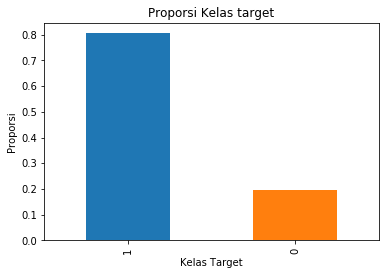

In [36]:
plt.title('Proporsi Kelas target')
plt.xlabel('Kelas Target')
plt.ylabel('Proporsi')
data['credit.policy'].value_counts(normalize=True).plot.bar()
plt.show()

### 6. Berapa variansi (ragam) nilai installment?

In [21]:
data.installment.var()

42878.52390484531

Nilai variansi installment = 42878.52390484531

### 7. Berapa nilai simpangan kuartil pada variable ‘installment’?

In [22]:
summary = data.installment.describe()

In [25]:
IQR = summary['75%'] - summary['25%']

In [28]:
print('Simpangan quartilnya = ', IQR)

Simpangan quartilnya =  268.99249999999995


### 8. Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [32]:
print(data.groupby('purpose').max()['installment'])

purpose
all_other             916.95
credit_card           922.42
debt_consolidation    940.14
educational           861.88
home_improvement      902.06
major_purchase        898.55
small_business        926.83
Name: installment, dtype: float64


### 9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.

#### Ada berapa kategori pada variable tersebut?

In [33]:
data['purpose'].nunique()

7

Ada 7 kategori purpose

#### Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

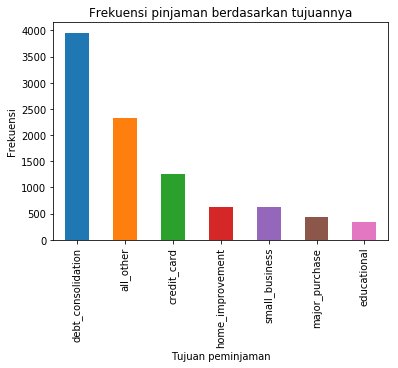

In [38]:
plt.title('Frekuensi pinjaman berdasarkan tujuannya')
plt.xlabel('Tujuan peminjaman')
plt.ylabel('Frekuensi')
data['purpose'].value_counts().plot.bar()
plt.show()

### 10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.

Visualisasi fico dengan target menggunakan boxplot

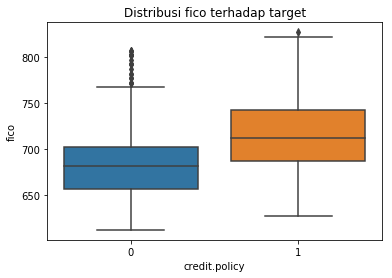

In [41]:
plt.title('Distribusi fico terhadap target')
sns.boxplot(y='fico', x='credit.policy', data=data)
plt.show()

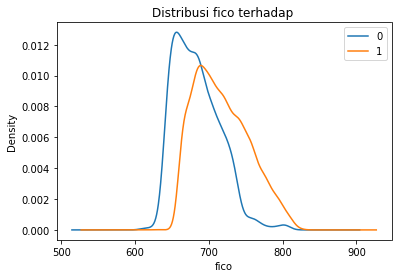

In [130]:
plt.title('Distribusi fico terhadap ')
plt.xlabel('fico')
data.groupby('credit.policy')['fico'].plot.density(legend=True)
plt.show()

Menurut saya, fico sudah cukup potensial sebagai prediktor, karena apabila dilihat dari density plot, persebaran datanya memiliki perpotongan di nilai 700, yang berarti apabila fico < 700 maka cenderung kelas 0, dan fico > 700 cenderung kelas 1

### 11.Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

In [116]:
cross_data = pd.crosstab(data['credit.policy'], data['purpose']).apply(lambda r: r/r.sum(), axis=0)

In [117]:
cross_data

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
credit.policy,,,,,,,
0,0.212784,0.191759,0.185494,0.259475,0.18601,0.15103,0.200323
1,0.787216,0.808241,0.814506,0.740525,0.81399,0.84897,0.799677


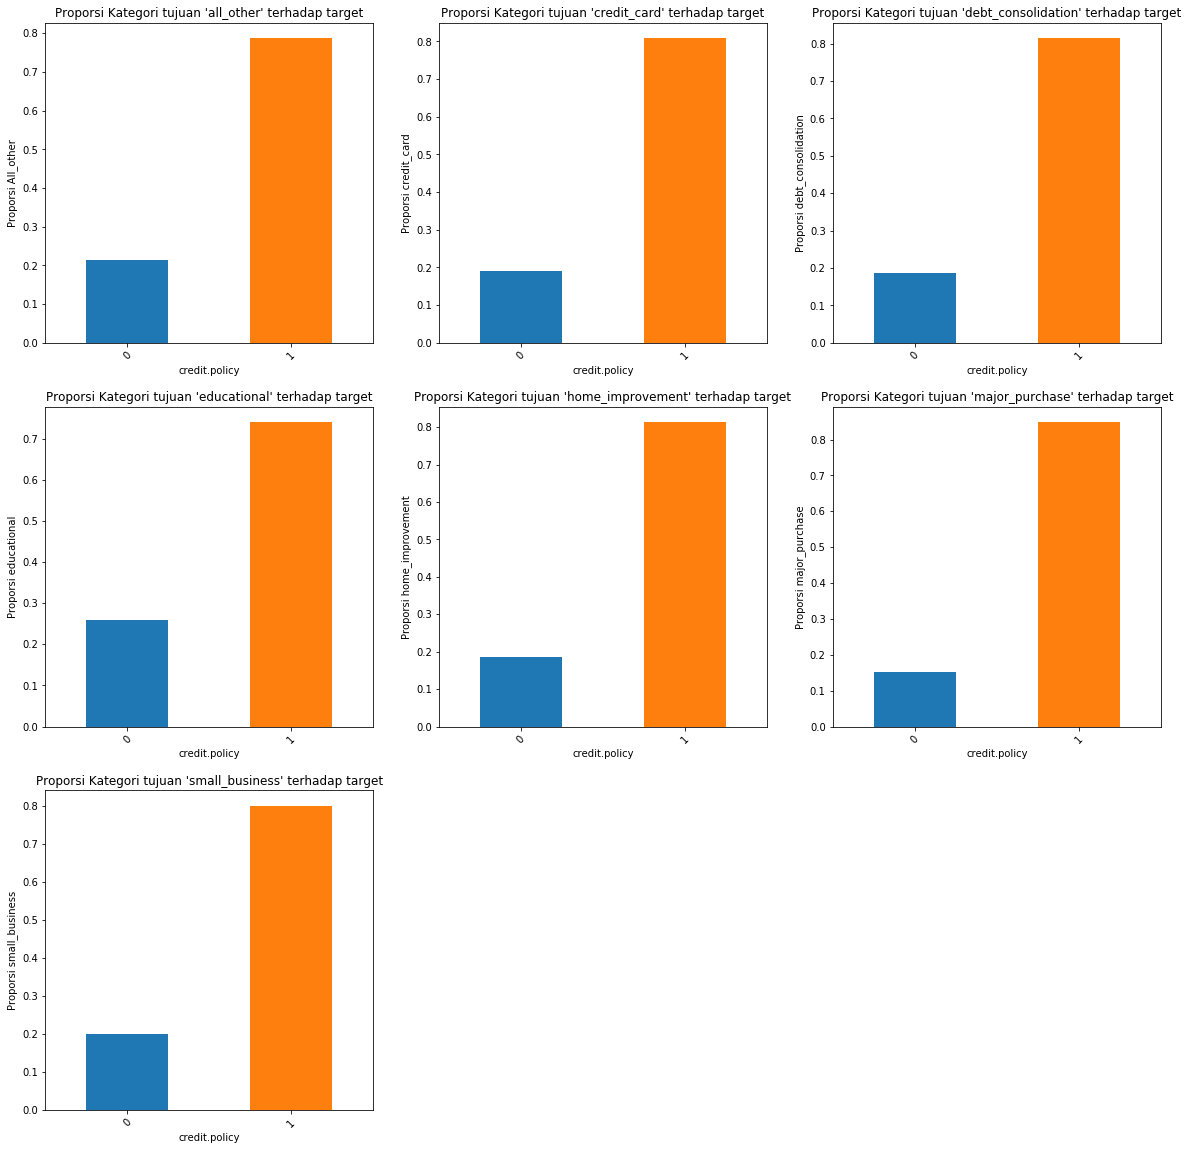

In [128]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.title("Proporsi Kategori tujuan 'all_other' terhadap target")
plt.xlabel('Kelas target')
plt.ylabel('Proporsi All_other')
cross_data.unstack()['all_other'].plot.bar(rot=45)
plt.subplot(3,3,2)
plt.title("Proporsi Kategori tujuan 'credit_card' terhadap target")
plt.xlabel('Kelas target')
plt.ylabel('Proporsi credit_card')
cross_data.unstack()['credit_card'].plot.bar(rot=45)
plt.subplot(3,3,3)
plt.title("Proporsi Kategori tujuan 'debt_consolidation' terhadap target")
plt.xlabel('Kelas target')
plt.ylabel('Proporsi debt_consolidation')
cross_data.unstack()['debt_consolidation'].plot.bar(rot=45)
plt.subplot(3,3,4)
plt.title("Proporsi Kategori tujuan 'educational' terhadap target")
plt.xlabel('Kelas target')
plt.ylabel('Proporsi educational')
cross_data.unstack()['educational'].plot.bar(rot=45)
plt.subplot(3,3,5)
plt.title("Proporsi Kategori tujuan 'home_improvement' terhadap target")
plt.xlabel('Kelas target')
plt.ylabel('Proporsi home_improvement')
cross_data.unstack()['home_improvement'].plot.bar(rot=45)
plt.subplot(3,3,6)
plt.title("Proporsi Kategori tujuan 'major_purchase' terhadap target")
plt.xlabel('Kelas target')
plt.ylabel('Proporsi major_purchase')
cross_data.unstack()['major_purchase'].plot.bar(rot=45)
plt.subplot(3,3,7)
plt.title("Proporsi Kategori tujuan 'small_business' terhadap target")
plt.xlabel('Kelas target')
plt.ylabel('Proporsi small_business')
cross_data.unstack()['small_business'].plot.bar(rot=45)
plt.show()

Dari grafik diatas tampak jelas bahwa purpose dari customer dapat mempengaruhi credit policy. Karena dari setiap kelas yang memiliki target 1 memiliki jumlah proporsi yang lebih banyak dari 0

### 12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [49]:
data[data['purpose'] == 'credit_card']['int.rate'].mean()

0.11973819334389857

rata-ratanya = 0.11973819334389857

### 13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [51]:
data[(data['installment'] > 200) & (data['purpose'] == 'educational')]['credit.policy'].count()

137

Terdapat 137 kasus

### 14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [52]:
loans3 = data[data['purpose'] == 'credit_card']

### 15. Siapkan data untuk pemodelan.

#### Ubah data kategorik menjadi dummy variabel.

Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [58]:
final_data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

In [60]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [61]:
from sklearn.model_selection import train_test_split

In [66]:
X = final_data.drop(['credit.policy'],1)
Y = final_data['credit.policy']

In [67]:
train_X,test_X,train_Y,test_Y =train_test_split(X,Y,test_size=0.30,
                                                random_state=101)

### 17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [68]:
dtree = DecisionTreeClassifier(random_state = 101)
dtree.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

### 18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [71]:
predictions = dtree.predict(test_X)

### 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
cm = confusion_matrix(test_Y,predictions)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[ 537   14]
 [  14 2309]]


### 20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [74]:
total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Accuracy :  0.9902574808629089
Sensitivity :  0.9939733103745158
Specificity :  0.9745916515426497


Model yang dihasilkan sudah sangat baik karena memiliki akurasi, sensitivity, specificty diatas 90% semua. Menurut saya, model yang seperti ini sudah baik digunakan untuk memprediksi